<a href="https://colab.research.google.com/github/sindrol/NeuralNewtork_NumericalMathematics/blob/main/Project2_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#These are different libraries used for different purposes
import random
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Task 1) Functions for generating synthetic input data

The functions below generates synthetic input data, and the resulting function-values based on which functions we have chosen. 

generate_data_rand generates datapoints randomly distributed in the given function domain. We will be using this mostly for training in batches, as we dont want to overtrain on small parts of the domain.

generate_data_ordered generates datapoints in an ordered fashion in the given function domain. This is useful for plotting, as the input will be sorted.

It is important to note that we for function 4 have excluded a small area around the origin to avoid divergence. We have also expanded the domain for all the functions, as to make sure that we get enough points throughout our entire domain, so that we avoid unwanted behaviour as a result of few points at the boundaries.

In [ ]:
#Generates datapoints for the functions randomly. Returns datapoints and the solution.
def generate_data_rand(datapoints,functionNum):                                           #Have to have randomized input for batch_train
    functions=[F_1,F_2,F_3,F_4,F_5]
    
    if functionNum==1:
        points = np.random.uniform(-2.6,2.6,(datapoints))                                     #Generates points in domain for first test function
    elif functionNum==2:
        points = np.random.uniform(-np.pi*1.5/3,np.pi*1.5/3,(datapoints))                         #------------||---------------- second test function
    elif functionNum==3:
        points = np.random.uniform(-2.6,2.6,(2,datapoints))                                   #------------||---------------- third test function
    elif functionNum==4:
        points = np.random.uniform(-2.6,2.6,(2,datapoints)) 
    elif functionNum==5:
        points=np.random.uniform(-2.6,2.6,(2,datapoints))                                        #------------||---------------- fifth test function
    else:
        raise IndexError("Function "+str(functionNum)+ " doesn't exist")

    fasit=functions[functionNum-1](points)                                                #Calculates the correct function values based on the datapoints
    return points, fasit

#Generates data for the funtions in a spaced manner. Suitible for plotting.
def generate_data_ordered(datapoints,functionNum): 
    functions=[F_1,F_2,F_3,F_4,F_5]
    
    if functionNum==1:
        points = np.linspace(-2,2,(datapoints))
    elif functionNum==2:
        points = np.linspace(-np.pi/3,np.pi/3,(datapoints))
    elif functionNum==3:
        temp = np.linspace(-2,2,(datapoints)) 
        points = np.array([temp]*2)
    elif functionNum==4:
        temp_1, temp_2 = np.linspace(-2, -0.1, int(datapoints/2)), np.linspace(0.1, 2, int(datapoints/2))
        points_1, points_2 = np.array([temp_1]*2), np.array([temp_2]*2)
        points = np.concatenate((points_1, points_2), axis=1)
    elif functionNum==5:
        temp = np.linspace(-2,2,(datapoints)) 
        points = np.array([temp]*2)
    else:
        raise IndexError("Function "+str(functionNum)+ " doesn't exist")

    fasit=functions[functionNum-1](points)
    return points, fasit

def F_1(y):                                                                               #d0=1, domain = [-2,2]
    return 0.5*y**2

def F_2(y):                                                                               #d0=1, domain=[-np.pi/3,np.pi/3]
    return 1-np.cos(y)

def F_3(y_vec):                                                                           #d0=2, domain=[-2,2]X[-2,2]
    return 0.5*(y_vec[0]**2 + y_vec[1]**2)

def F_4(y_vec):                                                                           #d0=2, domain!=(0,0). Siden sym, bruk <0,inf]? Ja lurt, kanskje bruke sånn 10^3 istedet for inf da
    return -1/np.sqrt(y_vec[0]**2 + y_vec[1]**2)

def F_5(x):                                                                               #d0=2, domain=[-2,2]X[-2,2]
    return 0.5*(x[0]**2+x[1]**2)+x[0]**2*x[1]-x[1]**3/3

#Trajectories data

Below is the handed out code which extracts the trajectory data.

In [ ]:
import csv
from ast import literal_eval
import re
"""
Both of the following functions import data. The output of both functions are a dictionary containing 5 arrays
    t: the array of av time points
    Q: the position values (q)
    P: the momentum values (p)
    T: the kinetic energy
    V: the potential energy
    
The data files contain data from 50 different trajectories, i.e. simulation of the path for a point with some 
initial position q0 and momentum p0. 

The function generate_data gives you the data from one of these data files, while the function concatenate
gives you the data from multiple trajectories at once. The default arguments of concatenate give you all the data
alltogether.

The folder project_2_trajectories must be placed in the same folder as your program to work. If the folder is in
some other location, the path for this location can be put into the string start_path.
"""
def generate_data(batch = 0):
    
    
    start_path = ""
    path = start_path+"project_2_trajectories/datalist_batch_" +str(batch)+".csv"
    with open(path,newline = "\n") as file:
        reader = csv.reader(file)
        datalist = list(reader)
    
    N = len(datalist)
    t_data = np.array([float(datalist[i][0]) for i in range(1,N)])
    Q1_data = [float(datalist[i][1]) for i in range(1,N)]
    Q2_data = [float(datalist[i][2]) for i in range(1,N)]
    Q3_data = [float(datalist[i][3]) for i in range(1,N)]
    P1_data = [float(datalist[i][4]) for i in range(1,N)]
    P2_data = [float(datalist[i][5]) for i in range(1,N)]
    P3_data = [float(datalist[i][6]) for i in range(1,N)]
    T_data = np.array([float(datalist[i][7]) for i in range(1,N)])
    V_data = np.array([float(datalist[i][8]) for i in range(1,N)])
                      
    Q_data = np.transpose(np.array([[Q1_data[i], Q2_data[i], Q3_data[i]] for i in range(N-1)]))
    P_data = np.transpose(np.array([[P1_data[i], P2_data[i], P3_data[i]] for i in range(N-1)]))
    
    return {"t": t_data, "Q": Q_data, "P": P_data, "T": T_data, "V": V_data}

def concatenate(batchmin=0, batchmax=50):
    dictlist = []
    for i in range(batchmin,batchmax):
        dictlist.append(generate_data(batch = i))
    Q_data = dictlist[0]["Q"]
    P_data = dictlist[0]["P"]
    T0 = dictlist[0]["T"]
    V0 = dictlist[0]["V"]
    tlist = dictlist[0]["t"]
    for j in range(batchmax-1):
        Q_data = np.hstack((Q_data, dictlist[j+1]["Q"]))
        P_data = np.hstack((P_data, dictlist[j+1]["P"]))
        T0 = np.hstack((T0, dictlist[j+1]["T"]))
        V0 = np.hstack((V0, dictlist[j+1]["V"]))
        tlist = np.hstack((tlist, dictlist[j+1]["t"]))
    return {"t": tlist, "Q": Q_data, "P": P_data, "T": T0, "V": V0}

#Some recurring functions used throughout the project

In [ ]:
#----------------------------------------------------------------------
#Some recurring functions

#Activation function
def sigmoid(x): 
    return np.tanh(x)

#Activation function (alternative function)
def relu(x): 
    if x<=0: 
        return 0
    else: 
        return x

#Hypothesis function
def etta1(x): 
    return x

#Hypothesis function (alternative function)
def etta2(x): 
    return (1+np.tanh(x/2))/2

#The first actiovation function differentiated
def dersigma(x): 
    return 1-np.tanh(x)**2

#The derivate of etta(x).
def deretta1(x):
    return np.ones(x.shape)
    
#The alternative hypothesis function differentiated 
def deretta2(x): 
    return (1-np.tanh(x/2)**2)/4

#Calculates the relative error in an estimate
def relative_Error(estimate,solution): 
    return np.linalg.norm(estimate-solution)/np.linalg.norm(estimate)


#Task 2)

We have created a NeuralNetwork class. After having initialized a NeuralNetwork object, one can train this object on a set of given training-data. One can choose to train in batches or to train on all of the data at once. In addition one can choose between using a gradient decent algorithm or using Adam decent. The network will store all the relevant variables for either calculating future function-values or to assess the performance of the network.

After having trained a network, one can apply this network to a new set of given input-data in the domain of the function one has trained on. Then the network will return the resulting function-values based on the input-values.

We decided to use the relative error as an indication for how well the system is trained. The standard objective function depends on the amount of datapoints. Using the relative error is more consistent.

In [ ]:
#Make a NeuralNetwork class with relevant membership functions and variables
class NeuralNetwork:
    #below follows some definitions we have made
    #----------------------------------------------------
    #W: dxd-matrix
    #beta: dxI-matrix
    #K: Number of layers
    #tau: learning parameter
    #h: stepsize
    #d0: The dimension of the input
    #d: Internal dimension
    #---------------------------------------------------------------------------------------------------------------
    #Initialising functions for the neural network. 

    #Main initialising function
    def __init__(self,layers,data,fasit,dimensjon,tol=0.05,learningparam=0.1,stepSize=0.1,maxiter=10000,scaling=True,verbose=False,adam=True,bmi=100,maxruntime=120,timeinterval=10, is_etta=True):#Init-funksjon. Skaper objektet

        etta_func=[etta1, etta2]
        etta_der = [deretta1, deretta2]
        self.is_etta=is_etta
        if(self.is_etta):
            self.etta = etta_func[0]
            self.deretta = etta_der[0]
        else:
            self.etta = etta_func[1]
            self.deretta = etta_der[1]

        #parameters for the dimensions of the matrices and vectors, and also the number of layers
        self.K=layers                                                                     #Number of layers in the neural network
        self.d=dimensjon                                                                  #Set internal dimention
        if len(data.shape)==1:
            self.I=len(data)                                                              #The number of datapoints
            self.d0=1                                                                     #The dimention of the input
        else:
            self.I=len(data[0])                                                           #The number of datapoints
            self.d0=len(data)                                                             #The dimention of the input
        #------------------------------------------------------
        
        #Variables related to the input data, transformed data and output data
        self.Y=data                                                                       #The inputdata
        self.c=fasit                                                                      #For the training case, c is the correct answers
        self.gZ=None                                                                      #Currently set to None, gZ is an array which will contain all the Z-values
        self.Gamma=np.zeros(self.c.shape)                                                 #The calculated solution
        self.batchmaxiter=bmi                                                             #Set the maximum number of iterations per batch. Default 100
        #------------------------------------------------------ 
        
        #Miscellaneous
        self.tau=learningparam                                                            #Learningparameter
        self.h=stepSize                                                                   #The stepsize. It determines how far the neural network will move along the gradient
        self.runtime=0                                                                    #The runtime. How long the algorithm took to run
        self.stats={"Jlist":[],"runtime":self.runtime}                                    #Stats is a dictionary. It will keep track of information like accuracy, runtime etc.
        self.accuracy = np.inf                                                            #The error of the system, currently set to be infinite
        self.tol=tol                                                                      #The tolerance. This is used as a convergence-condition
        self.ones=None                                                                    #Ones is an array containing only values equal to 1. It is used several places in the calculation.
        self.verbose=verbose                                                              #Bool for wether or not the algorithm gives feedback on how it's doing
        self.batch=False                                                                  #Bool for wether we are batch-training or not. Prevents unwanted actions
        self.adam=adam                                                                    #Bool for wether or not we use Adam-decent
        self.maxruntime=maxruntime                                                        #Set a max runtime so that the algorithm doesn't go on forever if it can't meet the convergence-conditions. Default 120 seconds
        self.timeinterval=timeinterval                                                    #How often you want feedback in seconds.
        #------------------------------------------------------
        
        #Variables related to iterations
        self.maxiter=maxiter                                                              #Maximum number of iterations the neural network will use in training on one dataset
        self.train_iter=0                                                                 #A variable used to keep track of the number of iterations which have been made
        #------------------------------------------------------
        
        #Scaling parameters and other things related to scaling
        self.scaling=scaling
        self.scaled=False                                                                 #Bolean used to keep track of wether or not the data is scaled.
        self.ay=None                                                                      #Scaling parameter used to scale input data
        self.by=None                                                                      #Scaling parameter used to scale input data
        self.ac=None                                                                      #Scaling parameter used to scale the answers
        self.bc=None                                                                      #Scaling parameter used to scale the answers
        self.alpha=0                                                                      #Scaling parameter
        self.beta=1                                                                       #Scaling parameter
        #------------------------------------------------------
        
        #Variables related to calculating the gradient for the neural network
        #p
        self.gP=None                                                                      #gP is an array which will contain all the P-values used to calculate the gradient. Currently set to None

        #W and the gradient for W
        self.gW=np.random.rand(self.K,self.d,self.d)                                      #gW is an Kxdxd-matrix which contains all the W-values. Elements are currently within [0,1]
        self.grad_W=np.zeros((self.K,self.d,self.d))                                      #grad_W is an Kxdxd-matrix which will contain the values of the gradient for each value of W
         
        #b and the gradient of b
        self.grad_b=np.zeros((self.K,self.d))                                             #grad_b is an KxI-matrix which will contain the values of the gradient for each value of b
        self.gb_important=np.random.rand(self.K,self.d)                                   #gb_important contains all the b-values. [b_0, b_1,...]^T.
        self.gb=None                                                                      #gb is an KxdxI-matrix consisting of every b-value, expanded to dxI as to fit with further calculations
        self.gb_trans=None                                                                #For optimizing run-time
           
        #omega and the gradient of omega
        self.omega=np.random.rand(self.d)                                                 #omega is a d-vector. Currently all the elements are within [0, 1/d] 
        self.grad_omega=np.zeros(self.d)                                                  #grad_omega is a d-vector which will contain the values for the gradient of omega
        
        #my and the gradient of my
        self.my=random.random()                                                           #my is a scalar with a value between [0, 1/d]
        self.grad_my=0                                                                    #grad_my is a scalar which will be the value of the gradient of my
        #------------------------------------------------------

        #Variables for adam-decent
        self.b1=0.9;self.b2=0.999;self.a=0.01;self.eps=10**(-8)                           #Constants for adam-decent
        self.vw=np.zeros((self.gW.shape)); self.mw=self.vw.copy()                         #The v and m-vector components of W
        self.vomega=np.zeros((self.omega.shape)); self.momega=self.vomega.copy()          #The v and m-vector components of omega
        vbk=None; mbk=None                                                                #The v and m-vector components of b. Declared now, but is set during the training initzialising.
        self.mmy=0;self.vmy=0                                                             #The v and m-vector component of my
        #------------------------------------------------------

    # A function made to create a b so that the dimensions of W@Z and b fits.
    # All of the fitted b-values are stored in gb.
    def update_gb(self,start_index,end_index):                                            #Updates gb and gb_trans when gb_important has been updated
        batch_size=end_index-start_index+1                                                #How large a dataset will we be training on (using indices to ease with batchtraining)
        for i in range(batch_size):
            self.gb_trans[i]= np.transpose(self.gb_important)                             #copying gb_impoortant into every element of gb_trans
        self.gb=np.transpose(self.gb_trans)                                               #Set gb equal to the transposed of gb_trans
   
    #A function made to transform the input data Y into Z_0=gZ[0] 
    def Y_to_Z0(self, start_index=0, end_index=-1):                                       #Y->Z0, transforms d0xI to dxI. New el are the mean of previous el
        
        if start_index>end_index:                                                         #Means the whole trainingdata-set is used
            batch_size=self.I                                                             #Just one batch, i.e. the batchsize is equal to the number of datapoints
            end_index=self.I-1                                                            #Updating end_index
        else:
            batch_size = (end_index-start_index)+1                                        #batch_size is updated to equal the size of the current part of the dataset which we will be using
        
        mean_calc=np.zeros(batch_size)                                                    #mean_calc is an array which will store the mean values of Y for every y_i (datapoint)
        made_mean=False                                                                   #Keeps track of whether mean_calc has been assigned mean values
      
        if self.d0==1:
            temp_Y = self.Y.reshape(1,len(self.Y))
        else:
            temp_Y=self.Y

        for i in range(self.d):
            if i<self.d0:
                Y_batch = np.transpose(np.transpose(temp_Y)[start_index:end_index+1])[i]
                self.gZ[0][i] = Y_batch
                
    #-------------------------------------------------------------------------------------------------------------------------------------

    #Training functions    
    #Default gradient descent neural network training function. 
    def train(self, start_index=0, end_index=-1):                                         #The function takes in the data as a membership-variable, and we utilize indices to decide what parts of the data we want to train on
        
        if self.verbose and not self.batch:                                               #if verbose, then the algorithm will give feedback during training of how it is doing
            print("Training of neural network started.")

        #Initializing of variables if not already inialized
        starttime=time.time()
        try:                                                                              #Runs only if gZ=None
            if self.gZ==None and start_index<end_index:                                   #problem if gZ is not initialized and trying to train a batch (problem occurs if trying to use train on a batch, not if using batch_train)
                raise SystemError
            
            end_index=self.I-1                                                            #Updating the end_index
            self.ones=np.ones(self.I)                                                     #an array containing the value 1 in all elements, used for further calculations
            self.gZ=np.zeros((self.K,self.d,self.I))                                      #Initializing gZ as an KxdxI matrix containing only zero-valued elements
            self.gP=np.zeros((self.K+1,self.d,self.I))                                    #Initializing gP as an (K+1)xdxI matrix containing only zero-valued elements
            self.gb=np.zeros((self.K,self.d,self.I))                                      #Initializing gb as an KxdxI-matrix containing only zero-valued elements
            self.gb_trans=np.zeros((self.I,self.d,self.K))                                #For optimizing run-time
            
            #Code for choosing correct gb
            for i in range(self.I): 
                self.gb_trans[i]= np.transpose(self.gb_important)                         #Set every element of gb_trans to the transposed of gb_important
            self.gb=np.transpose(self.gb_trans)                                           #gb is the transposed of gb_trans
            self.vbk=np.zeros((self.gb_important.shape)); self.mbk=self.vbk.copy()        #This is for when using the Adam-decent algorithm

            self.timespace=self.timeinterval

        except SystemError:
            print("Bruk batch_train dersom du ønsker å trene på batches.")                #If the error as stated above, print error
            return 0
        except:
            1==1                                                                          #had to include something inorder for the try-except to run, thus arbitrary True-statement

        #Scaling all the values Y. May help with quicker convergence
        if not self.scaled and self.scaling:                                              #If we're supposed to scale and havent yet, do scale.
            self.__scaling()                                                              #scaling
            self.scaled=True                                                              #Update inorder to tell that we have scaled

        self.Y_to_Z0(start_index, end_index)                                              #Transform Y to the appropriate format for Z0
        self.train_iter=0                                                                 #Have yet to do one iteration of training, set train_iter to 0
        
        not_trained_once=True                                                             #To make sure the model is trained at least once. (For batch_train)
        
        while not_trained_once or (self.accuracy>self.tol and self.train_iter<self.maxiter and self.runtime<self.maxruntime):
            not_trained_once=False                                                        #Now it will be trained once
            
            for k in range(1,self.K):                                                     #Compute Z_k
                self.gZ[k]= self.gZ[k-1]+self.h*sigmoid(self.gW[k-1]@self.gZ[k-1]+self.gb[k-1])
                
            #Compute Gamma
            self.Gamma[start_index:end_index+1] = self.etta((self.gZ[self.K-1]).transpose()@self.omega+self.my*self.ones)

            if self.adam:                                                                 #If we want to use Adam-decent
                self.adam_decent(start_index,end_index)
                
            else:                                                                         #We utilize gradient decent
                self.calculateGradient(start_index, end_index)                            #Computing the gradients for the chosen datapoints


                #Updating the values        
                self.gW -= self.tau*self.grad_W                                           #Updating gW
                self.gb_important -= self.tau*self.grad_b                                 #Updating gb_important

                self.update_gb(start_index,end_index)                                     #Updating gb

                self.omega -= self.tau*self.grad_omega                                    #Updating omega
                self.my -=self.tau*self.grad_my                                           #Updating my

            
            self.train_iter+=1                                                            #Updating iter
            
            self.calculateAccuracy(start_index, end_index)                                #Updating accuracy

            if not self.batch:
                self.runtime=time.time()-starttime                                        #The runtime for the iteration
            if self.verbose and self.runtime>self.timespace and not self.batch:
                self.timespace+=self.timeinterval
                print("At time",round(self.runtime,2),
                      "; Iterations:",self.train_iter,"; Error:",self.accuracy)           #print runtime and accuracy (performance)

        self.stats["runtime"]=self.runtime                                                #Update the stat "runtime"
        if self.train_iter>=self.maxiter and self.maxiter>500 and self.verbose:           #Trained for maxiter amount of times and verbose. Last argument to prevent batch_train from going frickn nuts
            print("Training stopped due to maximum number of iterations reached.")
        if self.runtime>self.maxruntime and not self.batch:                               #If we have a given maxruntime, and we have trained for a longer time, give feedback
            print("Training stopped due to runtime greater than max-runtime.")
        if self.verbose and not self.batch:                                               #Give feedback, last argument to prevent batcht_train from going frickn nuts
            print("Training finished. It took",self.stats["runtime"],"seconds.")

    #Batch-training method. Trains on batches of datapoints instead of all at once. 
    def batch_train(self,batch_size):                                                     #Function training the network on batches of input data

        if self.verbose:                                                                  #Feedback. Training has started.
            print("Training of neural network started.")

        self.batch=True                                                                   #Bool to check if we're in a batchtraining or not. Disables verbose and duplicate features in train().

        #Initializing of variables
        batches=int(self.I/batch_size)                                                    #Number of batches
        self.ones=np.ones(batch_size)                                                     #Update ones
        self.gZ=np.zeros((self.K,self.d,batch_size))                                      #Set gZ
        self.gP=np.zeros((self.K+1,self.d,batch_size))                                    #Set gP
        self.gb=np.zeros((self.K,self.d,batch_size))                                      #Set gb. KxdxI-matrix consisting of every b expanded to dxI
        self.gb_trans=np.zeros((batch_size,self.d,self.K))                                #For optimizing run-time
        
        self.timespace=self.timeinterval                                                  #Keep track of time so we give feedback when we should

        #Code for choosing correct gb
        for i in range(batch_size): 
            self.gb_trans[i]= np.transpose(self.gb_important)
        self.gb=np.transpose(self.gb_trans)
        self.vbk=np.zeros((self.gb_important.shape)); self.mbk=self.vbk.copy()
        
        temp_maxiter=self.maxiter                                                         #Store temporarily. We want a lower number of iterations per batch
        self.maxiter=self.batchmaxiter                                                    #Set it to max iter per batch
        num_ok_batches=100                                                                  #Number of batches that have to meet the convergence condition in a row before we break
        start_index = 0                                                                   #We split our batches using arrays. Using start_index to keep track of the beginning of a batch
        end_index   = batch_size-1                                                        #end_index to keep track of the ending of a batch
        
        iter_vec = np.zeros(batches*1000)                                                 #To keep track of convergence-conditions
        iter_vec[0:num_ok_batches]=np.ones(num_ok_batches)*(num_ok_batches+1)             #To not fuck up stop-condition
        iter_sum=0                                                                        #the total number of iterations in batch-train
        iter=0                                                                            #Iterations in the while-loop

        starttime=time.time()                                                             #Timestamp to calculate runtime

        #Trining loop
        while iter_sum<temp_maxiter:                                                      #Iterates maximum maxiter times

            self.train(start_index, end_index)                                            #Train on a batch
          
            start_index, end_index = start_index + batch_size, end_index + batch_size     #Goto next batch

            if end_index > self.I:                                                        #Check if we looped around and reset
                start_index = 0
                end_index   = batch_size-1

            iter_sum += self.train_iter                                                   #Add number of iterations to the total             
            iter_vec[iter] = self.train_iter                                    

            #if the convergence-conditions are met in a satisfying number of batches in a row, then training is finished
            if sum(iter_vec[iter+1 -num_ok_batches: iter+1])<=num_ok_batches and iter>=num_ok_batches:
                break
            
            iter += 1                                                                     #Increment the iter
            
            self.runtime=time.time()-starttime                                            #Update the runtime

            if self.verbose and self.runtime>self.timespace:                              #Check if we are supposed to give feedback.
                self.timespace+=self.timeinterval
                print("At time",round(self.runtime,2),"; Iterations:",iter_sum,"; Error:",self.accuracy)

            if iter%(batches*1000)==0:                                                    #To stop iter_vec from going out of bounds
                iter=0
            
        self.maxiter=temp_maxiter                                                         #Reset the variable
        self.stats["runtime"]=self.runtime                                                #Saving the runtime

        if self.runtime>self.maxruntime:                                                  #We exceeded the max-runtime. Print it out
            print("Training stopped due to runtime greater than max-runtime.")

        if self.verbose:                                                                  #Training finished. Print it out
            print("Training finished. It took",self.runtime,"seconds.")
        self.batch=False                                                                  #Reset the variable in case we want to train without batches. 


    #Adam decent algorithm. Provides quicker convergence at the cost of calculation time
    def adam_decent(self,start_index,end_index):
        
        for j in range(1,self.K):                                                         #Iterate through all the layers
            self.calculateGradient(start_index,end_index)                                 #Calculated the gradient
            
            #Calculate m-vector
            tempb1=1-self.b1
            self.mw=self.b1*self.mw+tempb1*self.grad_W
            self.momega=self.b1*self.momega+tempb1*self.grad_omega
            self.mbk=self.b1*self.mbk+tempb1*self.grad_b
            self.mmy=self.b1*self.mmy+tempb1*self.grad_my
            
            #Calculate v-vector
            tempb2=1-self.b2
            self.vw=self.b2*self.vw+tempb2*(self.grad_W*self.grad_W)
            self.vomega=self.b2*self.vomega+tempb2*(self.grad_omega*self.grad_omega)
            self.vbk=self.b2*self.vbk+tempb2*(self.grad_b*self.grad_b)
            self.vmy=self.b2*self.vmy+tempb2*(self.grad_my*self.grad_my)
            
            #Calculate the mhats
            b1j=1-self.b1**(j)
            self.mwhat=self.mw/b1j
            self.momegahat=self.momega/b1j
            self.mbkhat=self.mbk/b1j
            self.mmyhat=self.mmy/b1j
            
            #Calculate the vhats
            b2j=1-self.b2**(j)
            self.vwhat=self.vw/b2j
            self.vomegahat=self.vomega/b2j
            self.vbkhat=self.vbk/b2j
            self.vmyhat=self.vmy/b2j
            
            #Update
            self.gW-=self.a*self.mwhat/(np.sqrt(self.vwhat)+self.eps*np.ones((self.gW.shape)))
            self.omega-=self.a*self.momegahat/(np.sqrt(self.vomegahat)+self.eps*np.ones((self.omega.shape)))
            self.gb_important-=self.a*self.mbkhat/(np.sqrt(self.vbkhat)+self.eps*np.ones((self.gb_important.shape)))
            self.my-=self.a*self.mmyhat/(np.sqrt(self.vmyhat)+self.eps)

        #Update the gb vector
        self.update_gb(start_index,end_index)
    #-------------------------------------------------------------------------------------------------------------------------------------

    #Function for calculating the gradient of the neural network
    def calculateGradient(self, start_index=0, end_index=-1): 
        temp=self.deretta((self.gZ[-1]).transpose()@self.omega+self.my*self.ones)              #temp variable 1. partial result used in further calculations
        
        if start_index>end_index:                                                         #temp variable 2. partial result used in further calculations
            temp2=self.Gamma-self.c
        else:
            temp2=self.Gamma[start_index:end_index+1]-self.c[start_index:end_index+1]

        self.grad_my=temp.transpose()@(temp2)                                             #Update grad_my
        self.grad_omega=self.gZ[-1]@((temp2)*temp)                                        #Update grad_omega
      
        self.gP[-1]=np.outer(self.omega,np.transpose(temp*temp2))                         #Calculate the last element in gP

        #Iterate k=K-1,K-2,...,0 and calculate P(k). Backwards propagation
        for k in range(self.K-1,0,-1): 
            self.gP[k]=self.gP[k+1]+self.h*self.gW[k].transpose()@(dersigma(self.gW[k]@self.gZ[k]+self.gb[k])*self.gP[k+1])
            
        #Forewards propagation. Calcualte the gradient for W and b for every layer
        for k in range(0,self.K):
            temp3=self.h*(self.gP[k+1]*dersigma(self.gW[k]@self.gZ[k]+self.gb[k]))        #Temp variable 3. Delresultat
            self.grad_W[k]=(temp3)@(self.gZ[k]).transpose()                               #Update element k in grad_W
            self.grad_b[k]=temp3@self.ones                                                #Update element k in grad_b

    #-------------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------------
      
    #Calculate the error. We use the relative error since it does not depend upon I. Thus we dont have to change it when we change datasets.
    def calculateAccuracy(self, start_index, end_index):
        self.accuracy=np.linalg.norm(self.Gamma[start_index:end_index+1]-self.c[start_index:end_index+1])/np.linalg.norm(self.Gamma[start_index:end_index+1])
        self.stats["Jlist"].append(self.accuracy)                                         #Add to a list so we can plot later

    #Plotting the log of the J-values with iter
    def Jplot(self):

        plt.plot(np.arange(len(self.stats["Jlist"])),np.log(self.stats["Jlist"]))

        #Check if we're using adam-decent or not. Adjust title
        if self.adam:
            plt.title("Logarithm of objective function using ADAM-decent",size=20)
        else:
            plt.title("Logarithm of objective function using vanilla-decent",size=20)
    
        plt.xlabel("Iterations",size=20)
        plt.ylabel("log(J)",size=20)
        plt.grid()
        plt.show()

    #-------------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------------
    
    #Scaling funtion. Scales the input and the solution. May help with convergence
    def __scaling(self):
        self.ay = np.min(self.Y)                                                          #Finding scaling parameters or input
        self.by = np.max(self.Y)                                                          #--------||--------------
        self.ac = np.min(self.c)                                                          #Finding scaling parameters for the correct answers
        self.bc = np.max(self.c)                                                          #--------||--------------
            
        enere = np.ones(self.Y.shape)                                                     #Needed for calculations
        enere2 = np.ones(self.I)                                                          #Needed for calculations

        #Scale the Y-values
        self.Y=1/(self.by-self.ay)*((self.by*enere-self.Y)*self.alpha+(self.Y-self.ay*enere)*self.beta)
        
        #Scale the c-values
        self.c=1/(self.bc-self.ac)*((self.bc*enere2-self.c)*self.alpha+(self.c-self.ac*enere2)*self.beta)
    

    #-------------------------------------------------------------------------------------------------------------------------------------

    #apply is the function which will be used when we have a trained network
    #apply will be used on input-values, and will return the function-values
    def apply(self,data):
        #Need to check if input format is valid
        if len(data.shape)==1:
            datalength=len(data)                                                          #The number of datapoints
            inputdim=1                                                                    #The dimention of the input
        else:
            datalength=len(data[0])                                                       #The number of datapoints
            inputdim=len(data)                                                            #The dimention of the input

        #Check if the dimentions are correct
        if inputdim!=self.d0:                                                             #The data used for training and the one it is applied to is different dimensions.
            raise ValueError("The dimention of the input data does not match the dimention of the data the network was trained on.")

        #Adjust internal variables
        self.I=datalength                                                                 #Set a new datalength
        self.Y=data                                                                       #Copy the data
        self.c=None                                                                       #There is no solution-vector tied to the dataset. It is to prevent destructive training

        self.gZ=np.zeros((self.K,self.d,self.I))                                          #Format gZ
        self.gP=np.zeros((self.K+1,self.d,self.I))                                        #Format gP
        self.gb_trans=np.zeros((self.I,self.d,self.K))                                    #For optimizing run-time

        for i in range(self.I):                                                           #Choosing correct gb
            self.gb_trans[i]= np.transpose(self.gb_important)
        self.gb=np.transpose(self.gb_trans)
    
        #Scale the input data
        if self.scaling:
            enere = np.ones(self.Y.shape) 
            self.Y=1/(self.by-self.ay)*((self.by*enere-self.Y)*self.alpha+(self.Y-self.ay*enere)*self.beta) #scaling data
        
        self.Y_to_Z0()                                                                    #Transform the dimentions so they match
        
        #Apply W and b to the data
        for i in range(self.K-1): 
            self.gZ[i+1]=self.gZ[i]+self.h*sigmoid(self.gW[i]@self.gZ[i]+self.gb[i])

        #Calculate the output layer
        output=self.etta(self.gZ[-1].transpose()@self.omega + self.my*np.ones(self.I))
        
        #Scale the output data
        if self.scaling:
            enere=np.ones(self.I)
            return ((self.bc-self.ac)*output+(self.ac*self.beta-self.bc*self.alpha)*enere)/(-self.alpha+self.beta) #Skalerer og returnerer
        else:
            return output 
#------------------------------------------------------------------------------------------------------------------------------------------------------


#Task 2 a)

Below follows some plots for the known test-functions. The plots show the NeuralNetworks output for input from the domain.









Done training 1st Neural network
Done training 2nd Neural network


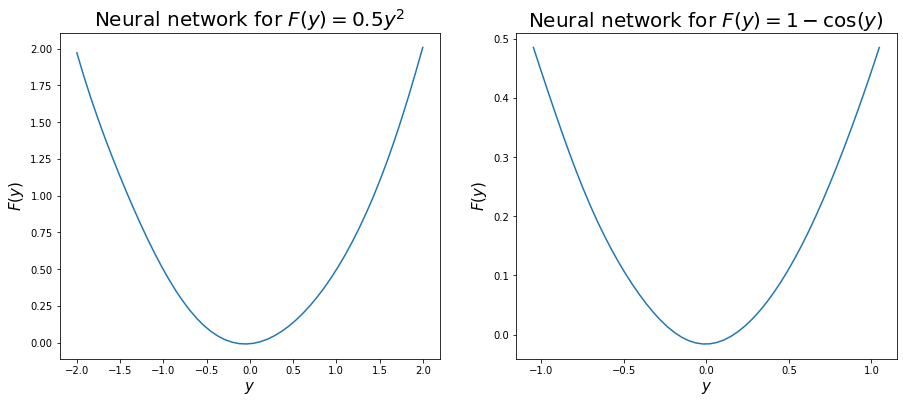

Training stopped due to runtime greater than max-runtime.
Done training 3rd Neural network
Done training 4th Neural network
Done training 5th Neural network


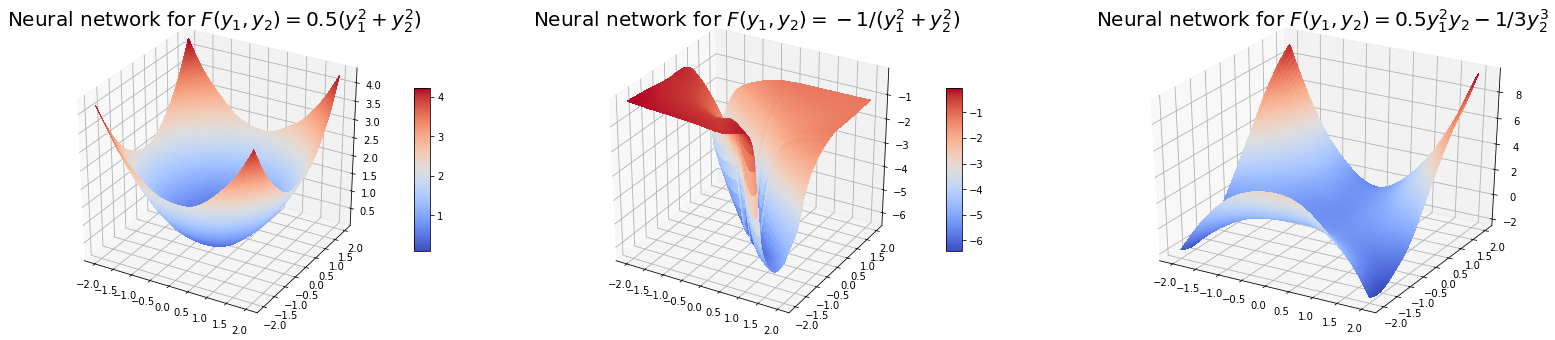

In [ ]:
#This is a support function, which will make a 3d-subplot. When it is called upon later, it
#is inorder to plot the functions F_3, F_4 and F_5 (F_5 is an expression which appears in the Henon-Heiles problem)
def plot_3d(points_1, points_2, points_3,nn_1, nn_2, nn_3,title="Z(X,Y)"):                
    fig = plt.figure(figsize = (27, 6))
    
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.set_title("Neural network for $F(y_1,y_2)=0.5(y_1^2+y_2^2)$", size=20)
    X_1 = points_1[0] #Extract the x-values
    Y_1 = points_1[1] #Extract y-values
    
    Z_1=[]    #Make a Z that we can plot
    vec_1=np.zeros((2,len(X_1)))
    for i in range(len(X_1)):
        vec_1[0]=X_1
        vec_1[1]=np.array([Y_1[i] for j in range(len(X_1))])
        Z_1.append(nn_1.apply(vec_1))
    
    Z_1 = np.array(Z_1)
    
    X_1, Y_1 = np.meshgrid(X_1, Y_1)
    
    surf = ax.plot_surface(X_1, Y_1, Z_1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.set_title("Neural network for $F(y_1,y_2)=-1/(y_1^2+y_2^2)$", size=20)
    X_2 = points_2[0] #Extract the x-values
    Y_2 = points_2[1] #Extract y-values
    
    Z_2=[]    #Make a Z that we can plot
    vec_2=np.zeros((2,len(X_2)))
    for i in range(len(X_2)):
        vec_2[0]=X_2
        vec_2[1]=np.array([Y_2[i] for j in range(len(X_2))])
        Z_2.append(nn_2.apply(vec_2))
    
    Z_2 = np.array(Z_2)
    
    X_2, Y_2 = np.meshgrid(X_2, Y_2)
    
    surf = ax.plot_surface(X_2, Y_2, Z_2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.set_title("Neural network for $F(y_1, y_2)=0.5y_1^2y_2-1/3y_2^3$", size=20)
    X_3 = points_3[0] #Extract the x-values
    Y_3 = points_3[1] #Extract y-values
    
    Z_3=[]    #Make a Z that we can plot
    vec_3=np.zeros((2,len(X_3)))
    for i in range(len(X_3)):
        vec_3[0]=X_3
        vec_3[1]=np.array([Y_3[i] for j in range(len(X_3))])
        Z_3.append(nn_3.apply(vec_3))
    
    Z_3 = np.array(Z_3)
    
    X_3, Y_3 = np.meshgrid(X_3, Y_3)
    
    surf = ax.plot_surface(X_3, Y_3, Z_3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    plt.show()

def solution_2a():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    #training and plotting func 1
    points_1, fasit_1 = generate_data_rand(1000, 1)                         #generate function data for training 
    nn_1 =NeuralNetwork(8,points_1,fasit_1,4,stepSize=0.1,tol=0.05,maxiter=1000000,verbose=False,adam=True,bmi=100)
    nn_1.batch_train(50)
    print("Done training 1st Neural network")                                                      #Train network
    test_points_1 = np.linspace(-2, 2, 50)
    output = nn_1.apply(test_points_1)                                         #apply network to ordered list of elements
    ax1.plot(test_points_1, output)                                            #plot
    ax1.set_title("Neural network for $F(y)=0.5y^2$",size=20)
    ax1.set_xlabel("$y$",size=15)
    ax1.set_ylabel("$F(y)$", size=15)
    #training and plotting func 2
    points_2, fasit_2 = generate_data_rand(1000, 2)                         #generate function data for training 
    nn_2 =NeuralNetwork(8,points_2,fasit_2,4,stepSize=0.1,tol=0.05,maxiter=1000000,verbose=False,adam=True,bmi=100)
    nn_2.batch_train(50)  
    print("Done training 2nd Neural network")                                                    #Train network
    test_points_2 = np.linspace(-np.pi/3, np.pi/3, 50)
    output = nn_2.apply(test_points_2)                                         #apply network to ordered list of elements
    ax2.plot(test_points_2, output)
    ax2.set_title("Neural network for $F(y)=1-\cos(y)$", size=20)
    ax2.set_xlabel("$y$", size=15)
    ax2.set_ylabel("$F(y)$", size = 15)                                         
    plt.show()                                                                                                                                       
    #training func 3
    points_3, fasit_3 = generate_data_rand(1000,3)                             #Generate function data for training 
    points_3_ordered, fasit_3_ordered = generate_data_ordered(100,3)          #Dataset for testing
    nn_3=NeuralNetwork(12,points_3,fasit_3,6,stepSize=0.1,tol=0.05,maxiter=1000000,verbose=False,adam=True,bmi=100, maxruntime=150)
    nn_3.batch_train(100)
    print("Done training 3rd Neural network")                                                      #Train network 
    #plot_3d(points_3_ordered,nn_3)                                             #plot                                                                            
    #training func 4
    points_4, fasit_4 = generate_data_rand(2000,4)                             #generate function data for training 
    points_4_ordered, fasit_4_ordered = generate_data_ordered(100,4)          #Dataset for testing
    nn_4=NeuralNetwork(12,points_4,fasit_4,6,stepSize=0.1,tol=0.05,maxiter=1000000,verbose=False,adam=True,bmi=100, maxruntime=150)
    nn_4.batch_train(250) 
    print("Done training 4th Neural network")

    #Training func 5 (A function which appears in the Henon-Heiles problem) F(y_1, y_2)=y_1^2*y_2-1/3*y_2^3
    points_5, fasit_5 = generate_data_rand(1000, 5)
    points_5_ordered, fasit_5_ordered = generate_data_ordered(100, 5)
    nn_5 = NeuralNetwork(12,points_5,fasit_5,6,stepSize=0.1,tol=0.05,maxiter=1000000,verbose=False,adam=True,bmi=100, maxruntime=150)
    nn_5.batch_train(100)
    print("Done training 5th Neural network")
                                                      #Train network 
    plot_3d(points_3_ordered,points_4_ordered, points_5_ordered,nn_3,nn_4, nn_5)                                             #plot  

solution_2a()                                              


From the plots above, one can see that the NeuralNetworks does approximate the given test functions quite well in the domains of the functions. 

#Task 2b)

Initial tests for different values for $K$, $\tau$, $h$, $d$ and so on, were done in a "non-structured" way, in order to gain some insight into what values seemed fitting.

From this, we found that $K$ around $4$ to $14$ works well depending on the problem. A learning parameter $\tau$ around $0.06$ was also found to be suitable. For $d$ it seemed that values around $3$ to $10$ works well. Lastly, it was found that $h$ around $0.1$ also gives desired results. The exact values that works well, differ based on the problem.

We have made a function (see under), which we tried to run in order to test for many different problems, for many different values. However, the code took to many hours to run, and thus we were left without that result.



In [ ]:
#Do not run, the code takes forever to finish.
def testHer():
    
    for func in [1,2,3,4]:
        for learningparam_ in [0.06,0.08,0.03,0.1,0.01]:
            for stepsize_ in [0.1,0.05,0.15,0.01]:
                for batchsize_ in [10,50,100,250,500]:
                    for K in [6,4,8,10]:
                        for d in [4,3,5,2,8]:
                            for adam_ in [True,False]:
                            
                                
                                for bmi_ in [2,10,100,200]:
                                    
                                    file=open("faktiske_tester.txt","a")
                                        
                                    points,fasit=generate_data2(10000,func)
                                    
                                    nn=NeuralNetwork(K,points,fasit,d,tol=0.0001,maxiter=np.inf,learningparam=learningparam_, stepSize=stepsize_, scaling=False,adam=adam_,bmi=bmi_,maxruntime=50)
                                    nn.batch_train(batchsize_)
                                    
                                    
                                    nn.calculateAccuracy(0,len(points))
                                    
                                    
                                    file.write("\n\nK="+str(K)+", d="+str(d)+ ", learningparam="+str(learningparam_)+ 
                                               ", stepsize="+str(stepsize_)+ ", scaling=False" + ", adam="+str(adam_)+
                                               ", bmi="+str(bmi_)+", batchsize="+str(batchsize_)+", func="+str(func))
                                    
                                    file.write("\nAccuracy="+str(round(nn.accuracy,6))+ " Time="+str(round(nn.stats["runtime"],2)))
                                    
                                    
                                    file.close()

#Task 2c) -2g)

Below follows a function which is the solutions to the problems 2c, 2d, 2e, 2f, 2g. 



In [ ]:
#This is a function which makes plots, which are the solutions to problem 2c, d, e, f, g
def solution_2c_2g():
    #Convergence plot with both gradient decent and Adam decent
    dic = generate_data(2)
    
    p, T, q, V = dic["P"], dic["T"], dic["Q"], dic["V"]
    
    nn_6 = NeuralNetwork(8, p, T, 3, stepSize=0.1,tol=0.05, maxiter=10000, verbose=True, adam=True, scaling = True,bmi=100, maxruntime=120)
    nn_6.train()
    print("Done training nn_5")
    nn_7 = NeuralNetwork(10, p, T, 5, learningparam=0.06,stepSize=0.05,tol=0.075, maxiter=100000, verbose=True, adam=False, scaling = True,bmi=100, is_etta=False)
    nn_7.batch_train(250)
    print("Done training nn_6")
    nn_8 = NeuralNetwork(11, q, V, 6, stepSize=0.1,tol=0.05, maxiter = 10000, verbose=True, adam = True, scaling=True, bmi = 100, maxruntime=120) 
    nn_8.train()
    print("Done training nn_7")
    
    i=0
    while (len(nn_7.stats["Jlist"])>len(nn_6.stats["Jlist"]) or len(nn_7.stats["Jlist"])<len(nn_6.stats["Jlist"])) and i<100000:
        if(len(nn_7.stats["Jlist"])>len(nn_6.stats["Jlist"])):
            (nn_6.stats["Jlist"]).append(nn_6.stats["Jlist"][-1])
        else:
            (nn_7.stats["Jlist"]).append(nn_7.stats["Jlist"][-1])
        i+=1

    iter_List = np.arange(0, len(nn_6.stats["Jlist"]),1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(iter_List, nn_6.stats["Jlist"], label="Adam")
    ax1.set_title("Convergence plot for Adam",size=20)
    ax1.legend()
    ax2.plot(iter_List, nn_7.stats["Jlist"], label="GD")
    ax2.set_title("Convergence plot for GD",size=20)
    ax2.legend()
    plt.show()
    
    T_approximate = nn_6.apply(p)
    V_approximate = nn_8.apply(q)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    
    ax1.plot(p[0], T_approximate, label="Neural network")
    ax1.plot(p[0], T, label="Correct values")
    ax1.set_title("Approximated T vs correct T",size=20)
    
    
    ax1.legend()

    ax2.plot(q[0], V_approximate, label="Neural network")
    ax2.plot(q[0], V, label="Correct values")
    ax2.set_title("Approximated V vs correct V",size=20)
    
    ax2.legend()
    plt.show()
    
    
    dic_2 = concatenate(batchmin=0,batchmax=45)
    p_2, T_2 = dic_2["P"], dic_2["T"]                                                     #We wont be using q and V because of runtime             
    
    nn_test_1 = NeuralNetwork(12, p_2, T_2, 6, stepSize=0.1,tol=0.025, maxiter=20000, verbose=True, adam=True, scaling = True,bmi=100, maxruntime=300)
    nn_test_1.batch_train(250)
    dic_test = generate_data(46)
    
    p_test, T_test = dic_test["P"], dic_test["T"]
    T_2_approximate = nn_test_1.apply(p_test)
    
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    plt.plot(p_test[0], T_2_approximate, label="Neural network")
    plt.plot(p_test[0], T_test, label="Correct values")
    plt.title("Results for inputdata not within trainingdata")
    
    plt.legend()
    plt.show()

solution_2c_2g()

From the plots above, one can see that the NeuralNetwork utilizing Adam decent converges faster than one using gradient decent. Thus we have choosen to utilize Adam decent from now on.

Furthermore, the two subsequent plots show the approximated values for $T$ and $V$ plotted against the correct values for $T$ and $V$. From the plots, one can see that they are quite similar, and thus the NeuralNetwork approximates the Hamiltonian quite well.

In the last plot, one can see a NeuralNetwork trained on quite a few of the trajectorie batches. Then, it is applied to one trajectorie-batch which it has not trained on. The values given from the NeuralNetwork come quite close to the correct values. From this we can conclude that our NeuralNetwork can approximate an unknown Hamiltonian function, given sufficient training-data.

#Task 3)


The neural network gives a good approximation of the function $F:\mathbb{R}^d \rightarrow \mathbb{R}$, which one suppose is a differentiable function. Thus  
  
$$
F(y)=G\circ \Phi_{K-1} \circ \Phi_{K-2} \circ  \dots \circ \Phi_{0}(y), 
$$
  
where the maps $\Phi _k:\mathbb{R}^d \rightarrow \mathbb{R}^d, 0\leq k \leq K-1,$ and $G:\mathbb{R}^d \rightarrow \mathbb{R}$ are differentiable and of the form

$$
\Phi_k (y)= y +h\sigma (W_ky+b_k), \; G(y)=\eta (\omega ^T y +\mu).
$$
  
The parameters $W_k\in \mathbb{R}^{dxd}, \; b_k\in \mathbb{R}^{d}, \; \omega \in \mathbb{R}^{d}, \; \mu\in \mathbb{R}, \; h\in \mathbb{R}$ are all known. Let  
  
$$
\Psi_0 = \Phi_0, \; \Psi_k  = \Phi_k \circ \Psi_{k-1} =\Phi_{k} \circ  \dots \circ \Phi_{0}, \; k=0,\dots ,K-1,
$$
  
and observe that $Z^{(k)} = \Psi_{k-1}(y), \; k=1,\dots ,K$. The chain rule then gives
  
$$
\nabla F(y) = (D\Psi_{K-1}(y))^T \nabla G(Z^{(K)}),
$$
  
and
  
$$
(D\Psi_{k-1}(y))^T = (D\Psi_{k-2}(y))^T \cdot (D\Phi_{k-1}(Z^{(k-1)})^T), \; k=2,\dots ,K,
$$
  
which can be seen in greater detail in "TMA4215 – Project 2 Supplement". Here $\cdot$ is the matrix-matrix multiplication. This recursive expression for $\nabla F(y)$ can be written as pseudo-code
  
  
**Compute all $Z^{(k)}$  
$A = \nabla G(Z^{(K)})$  
For $k = K, K-1,\dots , 1$  
$A = (D\Phi_{k-1}(Z^{(k-1)}))^T A,$  
return A**
  
  
It remains to compute $\nabla G(Z^{(K)})$ and $(D\Phi_{k-1}(Z^{(k-1)}))^T A$. Using the expression for $G(y)$, one gets
  
$$
\nabla G = \eta '(\omega^T y + \mu)\omega,
$$
  
as shown in greater detail in "TMA4215 – Project 2 Supplement". Using the expression for $D\Phi_{k-1}(y)$ and the pseudo-code, one gets
  
$$
(D\Phi_{k-1}(Z^{(k-1)}))^T A = A + W_{k-1}^T (h\sigma '(W_{k-1} Z^{(k-1)} + b_{k-1})\odot A),
$$
  
as shown in greater detail in "TMA4215 – Project 2 Supplement". Here $\odot$ is the Hadamard product between to matrices.

#Task 4)-5)

Below follows both the function for calculating the gradient of the Hamiltonian's components $T$ and $V$, based on variables from the NeuralNetworks, and the sympletic Euler and Størmer-Verlet algorithms. 

Both sympletic Euler and Størmer-Verlet takes in one NeuralNetwork representing $T$ (nn_T) and one representing $V$ (nn_V). It also takes in intial values for p and q, given by p0 and q0. Lastly, they both take in a list of timepoints which decide where p and q will be calculated. 

In addition, there also follows an additional function: check_Hamiltonian. This function takes in the values of q and p after they have been calculated, along with the respective NeuralNetworks. This function then calculates the Hamiltonian along the trajectorie. One can use this function for plotting the Hamiltonian along the trajectories calculated with sympletic Euler and Størmer-Verlet to see if it is preserved. 

Also, in the making of the following neural networks, we did not scale our data. This is because calc_gradient use the internal variables of the neural networks to calculate the gradient. By scaling the input, the values in the gradient will change. Since we usually only scale our input and output, this will cause problems and incompatibility with sympletic Euler and Størmer-Verlet. Therefore we will not use it from here on.

In [ ]:
#These are the functions related to and including the Størmer-verlet and sympletic-Euler algorithms
def calc_gradient(nn): #nn is a neural network
    omega=nn.omega.reshape(len(nn.omega),1) #Reshape nn.omega from (I,) to (I,1) and save as new variable omega
    A = deretta1(omega.transpose()@nn.gZ[-1]+nn.my)*omega #Calculating the first shait
    for k in range(nn.K-1, 0, -1):
        A = A+(nn.gW[k-1].transpose())@(nn.h*(dersigma(nn.gW[k-1]@nn.gZ[k-1]+nn.gb[k-1])*A))
    return A[0:nn.d0]

#Function for calculating the hamiltonian
def check_Hamiltonian(q, p, nn_T, nn_V):
    H = []
    for i in range(len(q)):
        H.append(nn_T.apply(p[i])+nn_V.apply(q[i]))
    return H

   
def sympletic_Euler(nn_T, p0, nn_V, q0, tlist):
    i=1
    q_n = np.array([q0 for j in range(len(tlist))])
    p_n = np.array([p0 for j in range(len(tlist))])
    
    while tlist[i-1]<tlist[-1]:
        h=tlist[i]-tlist[i-1]
        
        #traversing
        
        nn_T.apply(p_n[i-1]) #Updating the Z-values
    
        q_n[i]=q_n[i-1]+h*calc_gradient(nn_T)
        
        nn_V.apply(q_n[i]) #Updating the Z-values
        
        p_n[i]=p_n[i-1]-h*calc_gradient(nn_V)
       
        i+=1
    
    #Get the Hamiltonian
    H = check_Hamiltonian(q_n, p_n, nn_T, nn_V) 
    return q_n, p_n, H
        
def størmer_Verlet(nn_T, p0, nn_V, q0, tlist):
    i=1
    q_n = np.array([q0 for j in range(len(tlist))])
    p_n = np.array([p0 for j in range(len(tlist))])
    
    p_n_half=0
    
    while tlist[i-1]<tlist[-1]:
        h=tlist[i]-tlist[i-1]
        
        #traversing
        nn_V.apply(q_n[i-1]) #Updating the Z-values
        p_n_half = p_n[i-1] - h/2*calc_gradient(nn_V)
        nn_T.apply(p_n_half) #Updating the Z-values
        
        q_n[i]=q_n[i-1]+ h*calc_gradient(nn_T)
        nn_V.apply(q_n[i]) #Updating the Z-values
        p_n[i]=p_n_half-h/2*calc_gradient(nn_V)
        i+=1
    #Get the Hamiltonian
    H = check_Hamiltonian(q_n, p_n, nn_T, nn_V)
    return q_n, p_n, H

# Nonlinear pendulum problem

The simplest separable hamiltonian problem. The input-dimension is 1-dimensional, meaning that calculations are fairly simple and we can expect our neural networks to work well. We only deal with well-behaved functions, and expect few problems. 

In [ ]:
#Generate training-data.
p_pend,fasitp_pend=generate_data_rand(10000,1) #Training data for T(p)
q_pend,fasitq_pend=generate_data_rand(10000,2) #Training data for V(q)

#Generate test data to check if the error is small
p_pend_check,fasitp_check=generate_data_rand(1000,1) #Data to check relative error after training
q_pend_check,fasitq_check=generate_data_rand(1000,2) #----||----

In [ ]:
#Make a network for the T(p) and train it.
nn_p_pend=NeuralNetwork(4,p_pend,fasitp_pend,8,stepSize=0.1,tol=0.01,maxiter=np.inf,learningparam=0.01,scaling=False,verbose=True,bmi=100,maxruntime=120)
nn_p_pend.batch_train(10)
nn_p_pend.calculateAccuracy(0,len(fasitp_pend))

#Calculate the relative error. Used to indicate if the results are good. values < 0.05 are good
print("Relative error:",relative_Error(nn_p_pend.apply(p_pend_check),fasitp_check))

In [ ]:
#Make a network for the V(q) and train it.
nn_q_pend=NeuralNetwork(5,q_pend,fasitq_pend,8,stepSize=0.1,tol=0.01,maxiter=np.inf,learningparam=0.06,scaling=False,verbose=True,maxruntime=120)
nn_q_pend.batch_train(10)
nn_q_pend.calculateAccuracy(0,len(fasitq_pend))

#Calculate the relative error. Used to indicate if the results are good. values < 0.05 are good
print("Final accuracy",relative_Error(nn_q_pend.apply(q_pend_check),fasitq_check))

In [ ]:
#Make time-axis
tlist_pend=np.linspace(0,20,1000)

#Calculate numerical solution using both methods
qn_pend_størm,pn_pend_størm,H_pend_størm=størmer_Verlet(nn_p_pend, np.reshape([-0.5],(1,1)), nn_q_pend, np.reshape([0.5],(1,1)), tlist_pend)
qn_pend_Euler,pn_pend_Euler,H_pend_Euler=sympletic_Euler(nn_p_pend, np.reshape([-0.5],(1,1)), nn_q_pend, np.reshape([0.5],(1,1)), tlist_pend)

#Make subplot for the Hamiltonian
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

#Plotting of the hamiltonian using sympletic euler
ax1.plot(tlist_pend,H_pend_Euler)
ax1.set_title("Hamiltonian of the nonlinear \npendulum problem using \nsympletic Euler",size=20)
ax1.set_xlabel("t",size=20)
ax1.set_ylabel("H(p,q)",size=20)

#Plotting of the Hamilton using størmer-verlet
ax2.plot(tlist_pend,H_pend_størm)
ax2.set_title("Hamiltonian of the nonlinear \npendulum problem using \nStørmer-Verlet",size=20)
ax2.set_xlabel("t",size=20)
ax2.set_ylabel("H(p,q)",size=20)

plt.show()
print("Maximum Euler:",max(H_pend_Euler),"\t\t\tMaximum Størmer-Verlet:",max(H_pend_størm),
      "\nMinimum Euler:",min(H_pend_Euler),"\t\t\tMinimum Størmer-Verlet:",min(H_pend_størm),
      "\nDifference Euler:",max(H_pend_Euler)-min(H_pend_Euler),"\t\t\tDifference Størmer-Verlet:",
      max(H_pend_størm)-min(H_pend_størm))
fig2,(ax3,ax4) = plt.subplots(1,2,figsize=(20,5))

#Plotting of the phase-plot using sympletic Euler
ax3.plot(qn_pend_Euler[:,0],pn_pend_Euler[:,0])#Plot first dim
ax3.set_xlabel("q",size=20)
ax3.set_ylabel("p",size=20)
ax3.set_title("Phase-plot using \nsympletic Euler",size=20)

#Plotting of the phase-plot using Størmer-Verlet
ax4.plot(qn_pend_størm[:,0],pn_pend_størm[:,0])#Plot first dim
ax4.set_xlabel("q",size=20)
ax4.set_ylabel("p",size=20)
ax4.set_title("Phase-plot using \nStørmer-Verlet",size=20)

plt.show()

As shown in the plots, the Hamiltonian is approximately constant in time. This holds for both sympletic Euler and Størmer-Verlet methods. One can clearly see that hamiltonian resulting from the Størler-Verlet method varies less. This is expected as Størmer-Verlet is of higher order than the sympletic Euler method. The phase-plot for the pedulum is a closed loop. This is expected as no energy leaves the system. 

# Kepler two-body problem

A problem in the 2d-space. The functions here are more complex, and may therefore require more computation to converge. We are dealing with a funtion that has a singularity. That makes it hard for a network to simulate, and some error and difficulty is to be expected.

In [ ]:
#Generate training-data
p_kep,fasitp_kep=generate_data_rand(1000,3) #data for training
q_kep,fasitq_kep=generate_data_rand(1000,4) #----||----

#Generate test-data
p_kep_check,fasitp_check=generate_data_rand(10000,3)#data for testing errors
q_kep_check,fasitq_check=generate_data_rand(10000,4)#---||---

In [ ]:
#Make neural network for V(q) and train it.
nn_q_kep=NeuralNetwork(8,q_kep,fasitq_kep,9,stepSize=0.16,tol=0.02,maxiter=np.inf,learningparam=0.06,adam=True,scaling=False,verbose=True,maxruntime=150,bmi=50)
nn_q_kep.batch_train(250)
nn_q_kep.calculateAccuracy(0,len(fasitq_kep))

#Get relative error
print("Final accuracy",relative_Error(nn_q_kep.apply(q_kep_check),fasitq_check))

In [ ]:
#Make neural network for T(p) and train it.
nn_p_kep=NeuralNetwork(10,p_kep,fasitp_kep,8,stepSize=0.1,tol=0.04,maxiter=np.inf,learningparam=0.01,adam=True,scaling=False,verbose=True,maxruntime=150)
nn_p_kep.batch_train(100)
nn_p_kep.calculateAccuracy(0,len(fasitp_kep))

#Get relative error
print("Final accuracy",relative_Error(nn_p_kep.apply(p_kep_check),fasitp_check))

In [ ]:
#Plotting the solution

#Create time axis
tlist_kep=np.linspace(0,10,1000)

#Get numerical solution using both methods
qn_kep_størm,pn_kep_størm,H_kep_størm=størmer_Verlet(nn_p_kep, np.reshape([-0.05,0.01],(2,1)), nn_q_kep, np.reshape([-0.01,-0.01],(2,1)), tlist_kep)
qn_kep_euler,pn_kep_euler,H_kep_euler=sympletic_Euler(nn_p_kep, np.reshape([-0.05,0.01],(2,1)), nn_q_kep, np.reshape([-0.01,-0.01],(2,1)), tlist_kep)

#Subplot for the hamiltonian
fig2,(ax3,ax4) = plt.subplots(1,2,figsize=(20,5))

#plot the Hamiltonian using sympletic euler
ax3.plot(tlist_kep,H_kep_euler)
ax3.set_title("Hamiltonian of the \nKepler two-body problem\nusing sympletic euler method",size=20)
ax3.set_xlabel("t",size=20)
ax3.set_ylabel("H",size=20)

#Plot the Hamiltonian using størmer verlet
ax4.plot(tlist_kep,H_kep_størm)
ax4.set_title("Hamiltonian of the \nKepler two-body problem\nusing Størmer-Verlet method",size=20)
ax4.set_xlabel("t",size=20)
ax4.set_ylabel("H",size=20)
plt.show()

print("Maximum Euler:",max(H_kep_euler),"\t\t\tMaximum Størmer-Verlet:",max(H_kep_størm),
      "\nMinimum Euler:",min(H_kep_euler),"\t\t\tMinimum Størmer-Verlet:",min(H_kep_størm),
      "\nDifference Euler:",max(H_kep_euler)-min(H_kep_euler),"\t\t\tDifference Størmer-Verlet:",
      max(H_kep_størm)-min(H_kep_størm))


#Make subplots for ssympletic euler
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.plot(pn_kep_euler[:,0],qn_kep_euler[:,0])#Plot first dim
ax1.set_title("First dimension phase-plot\nusing sympletic Euler method",size=20)
ax1.set_xlabel("p",size=20)
ax1.set_ylabel("q",size=20)

ax2.plot(pn_kep_euler[:,1],qn_kep_euler[:,1])#Plot second dim
ax2.set_title("Second dimension phase-plot\nusing sympletic Euler method",size=20)
ax2.set_xlabel("p",size=20)
ax2.set_ylabel("q",size=20)
plt.show()

#Make subplots for størmer-verlet method
fig3,(ax5,ax6) = plt.subplots(1,2,figsize=(20,5))

ax5.plot(pn_kep_størm[:,0],qn_kep_størm[:,0])#Plot first dim
ax5.set_title("First dimension phase-plot\nusing Størmer-Verlet method",size=20)
ax5.set_xlabel("p",size=20)
ax5.set_ylabel("q",size=20)

ax6.plot(pn_kep_størm[:,1],qn_kep_størm[:,1])#Plot second dim
ax6.set_title("Second dimension phase-plot\nusing Størmer-Verlet method",size=20)
ax6.set_xlabel("p",size=20)
ax6.set_ylabel("q",size=20)

plt.show()

*The* phase-plot is closed, which tells us that the energy in the system is preserved. We also see that the hamiltonian is constant, and that once again the Størmer-Verlet method gave a more precise approximation than the sympletic Euler method.

# Henon-Heiles problem

Another problem in the 2d-space. Here there are no singularities to deal with, so it should be computationally easier than the Kepler two-body problem. 

In [ ]:
#Generate training-data
points_q_HH,fasit_q_HH=generate_data_rand(10000,5)

In [ ]:
#First network
nn_p_HH = nn_p_kep                            #Using the same neural network for p as in Kepler

In [ ]:
#Second network
nn_q_HH=NeuralNetwork(5,points_q_HH,fasit_q_HH,9,tol=0.01,stepSize=0.1,maxiter=np.inf,scaling=False,bmi=50,verbose=True)
nn_q_HH.batch_train(250)

#Calculate relaive error
print("Total accuracy:",relative_Error(nn_q_HH.apply(points_q_HH),fasit_q_HH))

In [ ]:
#Create time axis
tlist_HH=np.linspace(0,10,100000)

#Get numerical solution using both methods
qn_HH_størm,pn_HH_størm,H_HH_størm=størmer_Verlet(nn_p_HH, np.reshape([-0.1,-0.1],(2,1)), nn_q_HH, np.reshape([0.1,0.1],(2,1)), tlist_HH)
qn_HH_euler,pn_HH_euler,H_HH_euler=sympletic_Euler(nn_p_HH, np.reshape([-0.1,-0.1],(2,1)), nn_q_HH, np.reshape([0.1,0.1],(2,1)), tlist_HH)


#Subplot for the hamiltonian
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

#plot the Hamiltonian using sympletic euler
ax1.plot(tlist_HH,H_HH_euler)
ax1.set_title("Hamiltonian of the \nHenon-Heiles problem problem\nusing sympletic euler method",size=20)
ax1.set_xlabel("t",size=20)
ax1.set_ylabel("H",size=20)

#Plot the Hamiltonian using størmer verlet
ax2.plot(tlist_HH,H_HH_størm)
ax2.set_title("Hamiltonian of the \nHenon-Heiles problem problem\nusing Størmer-Verlet method",size=20)
ax2.set_xlabel("t",size=20)
ax2.set_ylabel("H",size=20)
plt.show()

print("Maximum Euler:",max(H_HH_euler),"\t\t\tMaximum Størmer-Verlet:",max(H_HH_størm),
      "\nMinimum Euler:",min(H_HH_euler),"\t\t\tMinimum Størmer-Verlet:",min(H_HH_størm),
      "\nDifference Euler:",max(H_HH_euler)-min(H_HH_euler),"\t\t\tDifference Størmer-Verlet:",
      max(H_HH_størm)-min(H_HH_størm))


#Make subplots for sympletic euler
fig2,(ax3,ax4) = plt.subplots(1,2,figsize=(20,5))

ax3.plot(pn_HH_euler[:,0],qn_HH_euler[:,0])#Plot first dim
ax3.set_title("First dimension phase-plot\nusing sympletic Euler method",size=20)
ax3.set_xlabel("p",size=20)
ax3.set_ylabel("q",size=20)

ax4.plot(pn_HH_euler[:,1],qn_HH_euler[:,1])#Plot second dim
ax4.set_title("Second dimension phase-plot\nusing sympletic Euler method",size=20)
ax4.set_xlabel("p",size=20)
ax4.set_ylabel("q",size=20)
plt.show()

#Make subplots for størmer-verlet method
fig3,(ax5,ax6) = plt.subplots(1,2,figsize=(20,5))

ax5.plot(pn_HH_størm[:,0],qn_HH_størm[:,0])#Plot first dim
ax5.set_title("First dimension phase-plot\nusing Størmer-Verlet method",size=20)
ax5.set_xlabel("p",size=20)
ax5.set_ylabel("q",size=20)

ax6.plot(pn_HH_størm[:,1],qn_HH_størm[:,1])#Plot second dim
ax6.set_title("Second dimension phase-plot\nusing Størmer-Verlet method",size=20)
ax6.set_xlabel("p",size=20)
ax6.set_ylabel("q",size=20)
plt.show()

Just like in the Kepler two-body problem, the phase-plot in both dimensions is closed, and the hamiltonian is constant. 

# Unknown Hamiltonian

Here we will plot the hamiltonian of the supplied trajectory. We will plot the hamiltonian using both sympletic Euler and Størmer-Verlet.

In [ ]:
#Extract data from file
dict=generate_data(0) #select a dataset to train on. We chose trajectory 0 for simplicity
tlist=dict["t"]
P=dict["P"]
Q=dict["Q"]
T0=dict["T"]
V0=dict["V"]


In [ ]:
#Make network for T(p) and train
nn_T=NeuralNetwork(8,P,T0,3,stepSize=0.1,tol=0,maxiter=np.inf,learningparam=0.01,scaling=False,verbose=True,maxruntime=120)
nn_T.train()

In [ ]:
#Make network for V(q) and train
nn_V=NeuralNetwork(10,Q,V0,3,stepSize=0.1,tol=0,maxiter=np.inf,learningparam=0.01,scaling=False,verbose=True,adam=True,timeinterval=1/2,bmi=10,maxruntime=120)
nn_V.batch_train(512)

In [ ]:
#Now get the whole trajectory
dict=concatenate()
tlist=dict["t"]
P=dict["P"]
Q=dict["Q"]
T0=dict["T"]
V0=dict["V"]

In [ ]:
#Calculate the hamiltonian using sympletic euler
qn,pn,H=sympletic_Euler(nn_T,np.reshape(P[:,0],(3,1)),nn_V,np.reshape(Q[:,0],(3,1)),tlist)

#Calculate te hamiltonian using størmer verlet
qn2,pn2,H2 = størmer_Verlet(nn_T, np.reshape(P[:,0],(3,1)), nn_V, np.reshape(Q[:,0],(3,1)), tlist)

#Plot the two hamiltonians
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

#plot sympletic euler
ax1.plot(tlist,H)
ax1.set_title("The unknown hamiltonian \nusing Sympletic Euler",size=20)
ax1.set_xlabel("time",size=20)
ax1.set_ylabel("H",size=20)

#plot størmer verlet
ax2.plot(tlist,H2)
ax2.set_title("The unknown hamiltonian \nusing Størmer-Verlet",size=20)
ax2.set_xlabel("time",size=20)
ax2.set_ylabel("H",size=20)
plt.show()

print("Maximum Euler:",max(H),"\t\t\tMaximum Størmer-Verlet:",max(H2),
      "\nMinimum Euler:",min(H),"\t\t\tMinimum Størmer-Verlet:",min(H2),
      "\nDifference Euler:",max(H)-min(H),"\t\t\tDifference Størmer-Verlet:",
      max(H2)-min(H2))


In the plots above, one can see the Hamiltonian of the system. The difference between the maximum and minimum value of the Hamiltonian is very small, which is as expected. One can also see that the solution from Størmer-Verlet is better, which is as expected. It's clear that the neural networks are able to preserve the hamiltonian along the trajectories.